In [1]:
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import pandas as pd
import time
import math
from array import array

In [2]:
def get_eta(T, P):
    eta = 2.113e-7 * T**1.1 * (1 + 1.16*np.exp(-2.44*(np.log(T) + 0.56)**2))
    #print("Eta: " + str(eta))
    return eta

def get_eq_P(T):
    #n = 1.5e27 * T**1.5 * np.exp(-L/(k_B*T))
    #print("n: " + str(n))
    #return k_B * T * n
    
    i_0 = 12.2440
    return 0.1*T**2.5 * np.exp(i_0 - L/(k_B*T))

def get_k_ss(T):
    return 0.04*T**1.3

def get_mu_over_kB(T, P):
    #print((2*math.pi*m4)**(3/2)*(k_B*T)**(5/2))
    lambda_t = h/(2*math.pi*m4*k_B*T)**0.5
    #print("Lambda_t: " + str(lambda_t))
    mu_over_kB = np.log(P*lambda_t**3/(k_B *T))
    return mu_over_kB

def get_dP_dz(T, P):
    eta = get_eta(T, P)
    #print((math.pi * d**4 * L * P**2))
    return float(128 * eta * q_dot * k_B * T /(math.pi * d**4 * L * P))

def get_dT_dz(T, P):
    eta = get_eta(T,P)
    #print("Eta: " + str(eta))
    mu_over_kB = get_mu_over_kB(T, P)
    k_ss = get_k_ss(T)
    
    #print(math.pi * d**4 * L * P**2 * (2.5 - mu_over_kB))
    #print(q_dot*(np.pi*d*t))
    #print((2.5 - mu_over_kB)*np.pi*d**4*L*P**2/(128*eta*k_B * T**2))
    return (q_dot*(np.pi*((d + t)**2 - d**2)*k_ss + (2.5 - mu_over_kB)*(np.pi*d**4 *L*P**2)/(128*eta*k_B * T**2))**-1)


In [243]:
#all numbers are in MKS, i.e. kg, K, Pa s, etc.

L = 9.94e-23
k_B = 1.381e-23
h = 6.626e-34
m4 = 6.642e-27
inch = 0.0254
uw = 1e-6

d = 0.085*inch#0.0425*inch#0.0225*inch#id
t = (0.125*inch - d)/2#(0.0625*inch - d)/2# 0.02*inch#thickness
length = 20*inch
q_dot = 0.0008*uw #heat flow rate

In [244]:
step = 1e-5
n = int(length/step)
print(n)

T_start = 0.02
P_start = get_eq_P(T_start)
#print("P_start (Pa): "+ str(P_start))
z_start = 0

50800


In [245]:
T_arr = []
P_arr = []
z_arr = []

T_arr.append(T_start)
P_arr.append(P_start)
z_arr.append(z_start)
last_z = 0.0

i = 0
while i < n:
    T = T_arr[i]
    P = P_arr[i]
    z = z_arr[i]
    
    #print("T: " + str(T))
    #print("P: " + str(P))
    #print("z: " + str(z))
    
    dT_dz = get_dT_dz(T, P)
    dz = step
    #print("dz: " + str(dz))
    
    dT = dz * dT_dz
    T_arr.append(T + dT)
    
    #dP = dz * get_dP_dz(T, P)
    P_arr.append(get_eq_P(T + dT))
    #P_arr.append(P + dP)
    
    z_arr.append(z + dz)
    last_z = z_arr[i]
    
    i += 1

Last T: 0.08180414616757027


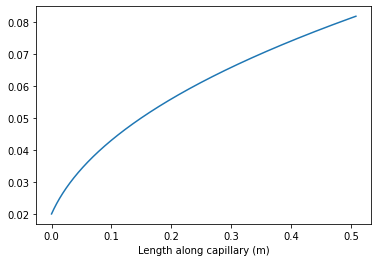

In [246]:
plt.plot(z_arr, T_arr)
#plt.plot(z_arr, P_arr)
plt.xlabel("Length along capillary (m)")

print("Last T: " + str(T_arr[n]))

In [148]:
micropoise = 1e-7
nu = 1.04 * micropoise
T = 3.0

def get_throughput(p_1, p_2, d, L):
    return (p_1**2 - p_2**2)*d**4 * np.pi/(256 * k_B * nu * T * L)

In [11]:
atm_to_pa = 1.013e5
p_1 = 0.25 * atm_to_pa
p_2 = 0.01 * atm_to_pa

n_in_cell = 2.71e24

throughput = get_throughput(p_1, p_2, d, length)

print("Time to empty cell (s): " + str(n_in_cell/throughput))

Time to empty cell (s): 13.472480992266235
